In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import PIL

In [15]:
# Image URLs for graph nodes
icons = {
    "router": "1.png",
    "switch": "2.png",
    "PC": "3.png",
}

In [16]:
#Load images
images={k: PIL.Image.open(fname) for k, fname in icons.items()}

In [18]:
#Generate graph
G=nx.Graph()
G.add_node("router", image=images["router"])
for i in range(1,4):
    G.add_node(f"switch_{i}", image=images['switch'])
    for j in range(1,4):
        G.add_node("PC_"+str(i)+"_"+str(j), image=images['PC'])
    

In [19]:
G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")

In [20]:
for u in range(1,4):
    for v in range(1,4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))

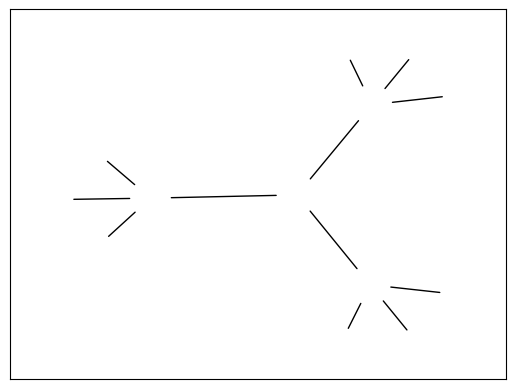

In [24]:
pos=nx.spring_layout(G, seed=1734289230)
fig, ax=plt.subplots()

nx.draw_networkx_edges(G, pos=pos, ax=ax, arrows=True, arrowstyle='-', min_source_margin=15,
                      min_target_margin=15)


In [25]:
tr_figure=ax.transData.transform
tr_axes=fig.transFigure.inverted().transform

In [26]:
icon_size=(ax.get_xlim()[1]-ax.get_xlim()[0])*0.025
icon_center=icon_size/2


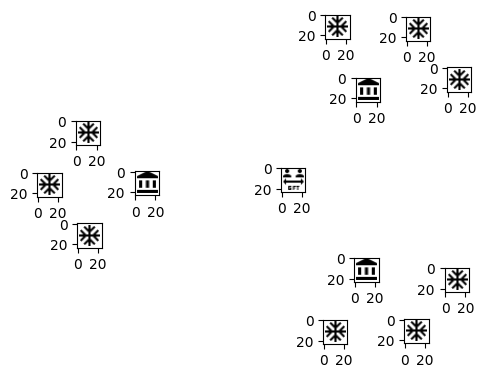

In [27]:
for n in G.nodes:
    xf, yf=tr_figure(pos[n])
    xa, ya=tr_axes((xf, yf))
    a=plt.axes([xa-icon_center, ya-icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis=("off")
plt.show()